In [1]:
# Evaluation Project Week 3 Flight price prediction

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# downloading datafile
df=pd.read_excel('Documents/Data_Train.xlsx')

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
# getting the info about 5 upper rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
#checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# getting the names of columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# getting the information about the type of data in dataset
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# checking the number of rows and columns
df.shape

(10683, 11)

In [11]:
# checking the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# we found null values in 2 columns which we need to remove so will use dropna command.

In [13]:
df.dropna(inplace = True)

In [14]:
# checking null valuse again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
# cheaking the unique values.

In [16]:
print(df['Source'].unique())
df['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [17]:
# now our dataset is prepared for analysis

In [18]:
#checking of airlines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

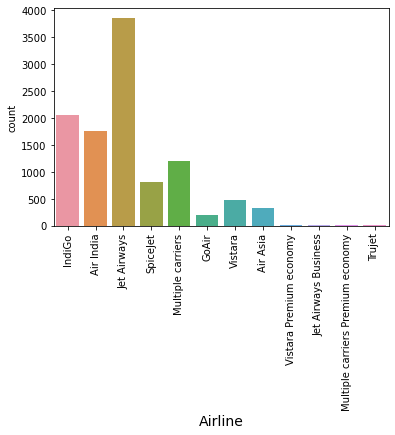

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Airline', data=df)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=90)

In [20]:
# cheaking of sources.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

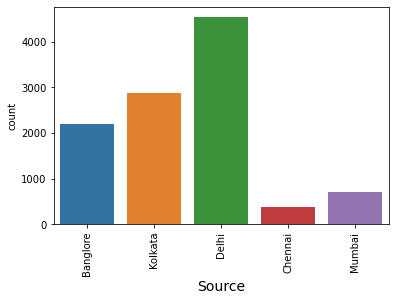

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Source', data=df)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)

In [22]:
# cheaking Destination.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

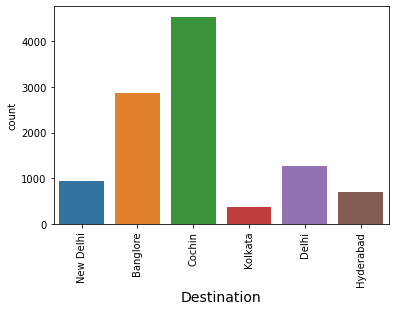

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Destination', data=df)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)

In [24]:
# cheaking total stops.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

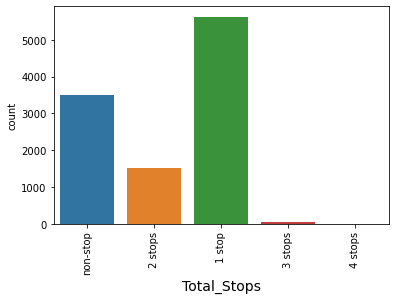

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Total_Stops', data=df)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)

In [26]:
# cheaking Additional info.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

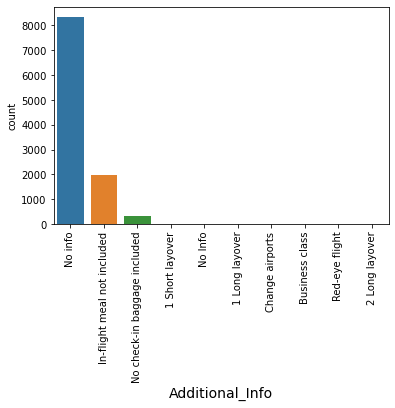

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Additional_Info', data=df)
plt.xlabel('Additional_Info', fontsize=14)
plt.xticks(rotation=90)

In [28]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [29]:
# now we need to work on converting the object type data to numeric data

In [30]:
#Date_of_journey
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [31]:
# Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [32]:
# Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [33]:
#Duration
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

df['Duration']=pd.to_numeric(df['Duration'])

In [34]:
# now we will use encoder to encode the columns airline , source and destination
from sklearn.preprocessing import LabelEncoder
columns = ['Airline','Source','Destination']
le = LabelEncoder()
for i in columns:
    df[i] = le.fit_transform(df[i])

In [35]:
# now we will drop our label i.e route from dataset
df.drop(["Route"], axis = 1, inplace = True)

In [36]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,non-stop,No info,3897,24,3,22,20,1,10
1,1,3,0,445,2 stops,No info,7662,1,5,5,50,13,15
2,4,2,1,1140,2 stops,No info,13882,9,6,9,25,4,25
3,3,3,0,325,1 stop,No info,6218,12,5,18,5,23,30
4,3,0,5,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,non-stop,No info,4107,9,4,19,55,22,25
10679,1,3,0,155,non-stop,No info,4145,27,4,20,45,23,20
10680,4,0,2,180,non-stop,No info,7229,27,4,8,20,11,20
10681,10,0,5,160,non-stop,No info,12648,1,3,11,30,14,10


In [37]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,non-stop,No info,3897,24,3,22,20,1,10
1,1,3,0,445,2 stops,No info,7662,1,5,5,50,13,15
2,4,2,1,1140,2 stops,No info,13882,9,6,9,25,4,25
3,3,3,0,325,1 stop,No info,6218,12,5,18,5,23,30
4,3,0,5,285,1 stop,No info,13302,1,3,16,50,21,35


In [38]:
# checking the counts of total stops

df["Total_Stops"].value_counts() 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
#Additional_info
df.drop(["Additional_Info"], axis = 1, inplace = True)

In [41]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,0,3897,24,3,22,20,1,10
1,1,3,0,445,2,7662,1,5,5,50,13,15
2,4,2,1,1140,2,13882,9,6,9,25,4,25
3,3,3,0,325,1,6218,12,5,18,5,23,30
4,3,0,5,285,1,13302,1,3,16,50,21,35


In [42]:
 #checking Duration relationship with Price

In [43]:
sns.distplot

<function seaborn.distributions.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)>

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

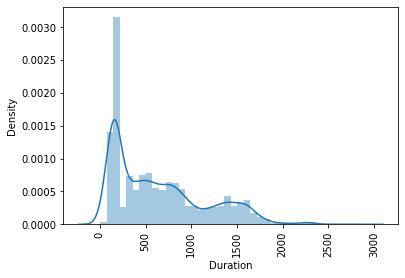

In [44]:
plot=plt.figure()
sns.distplot(df['Duration'],bins=40)
plt.xticks(rotation=90)

In [45]:
# now the graph is showing that there are presence of outliers 

In [46]:
# checking the corelation
df.corr()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.013397,0.018446,-0.159651,-0.199396,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.161886,0.192840,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.257352,-0.295476,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Duration,-0.159651,0.161886,-0.257352,1.000000,0.738071,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663
Total_Stops,-0.199396,0.192840,-0.295476,0.738071,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940
Price,-0.039565,0.015999,-0.071122,0.506480,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Journey_day,0.026137,0.004902,-0.041025,-0.022439,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510
Journey_month,0.024674,0.183268,-0.364682,0.014836,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626
Dep_hour,-0.035269,0.059047,-0.072997,0.002088,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911
Dep_min,-0.059922,-0.056998,0.127931,-0.019099,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597


In [47]:
# getting statistical description of dataset
df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,643.020502,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,2.352090,1.177276,1.474845,507.830133,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,0.000000,0.000000,0.000000,5.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,520.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,930.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,2860.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

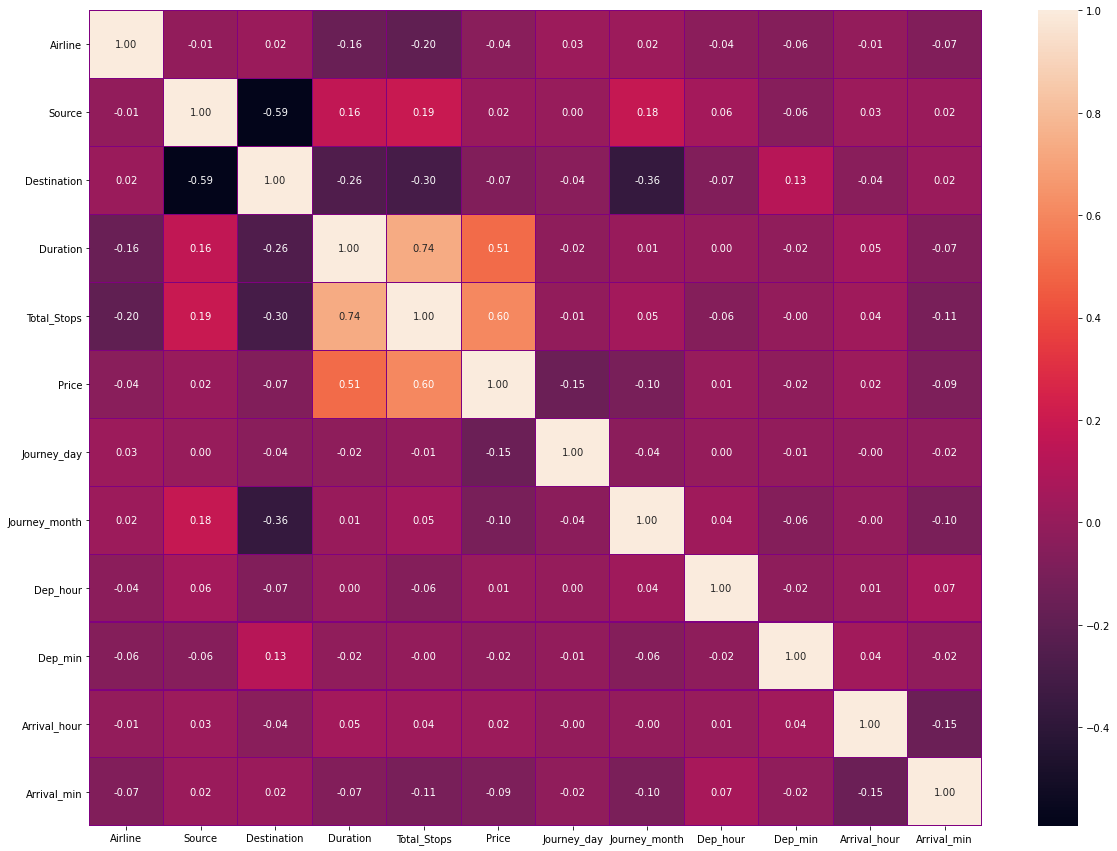

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=.1,linecolor='purple',fmt='.2f')

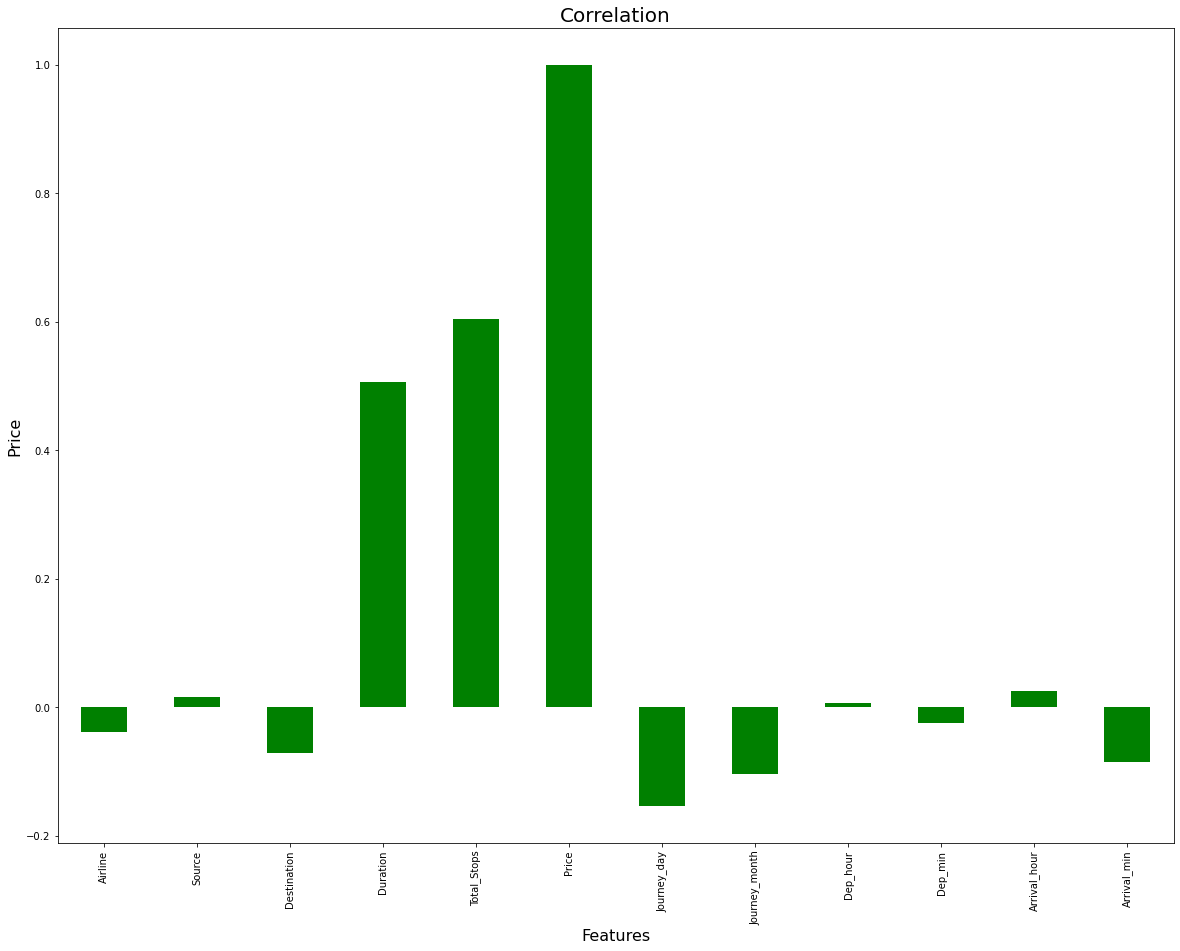

In [49]:
plt.figure(figsize=(20,15))
df.corr()['Price'].plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()

In [50]:
# hence lower segment graph shows that there is negative corelation also present

In [51]:
# now we will spilit data into x and y i. faeture and label

In [52]:
x=df.drop('Price',axis=1)

In [53]:
y=df['Price']

In [54]:
# now we will train our model
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
# now we will start building our model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
y_pred = rfr.predict(x_test)

In [58]:
rfr.score(x_train, y_train)

0.9530619136276811

In [59]:
# the random forest regressor score is 95%

In [60]:
from sklearn import metrics

In [61]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score:',(metrics.r2_score(y_test,y_pred)))

MAE: 1180.4626956723798
MSE: 4222570.787216972
RMSE: 2054.8894829690894
r2_score: 0.8041666006370047


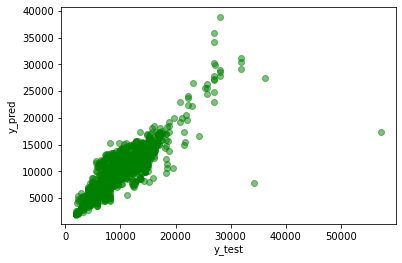

In [62]:
plt.scatter(y_test,y_pred,alpha=0.5,color="g")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [63]:
sns.scatterplot

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [65]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [66]:
# we will start with linear regression model

In [67]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [68]:
y_pred = LR.predict(x_test)

In [69]:
LR.score(x_train, y_train)

0.43338407568644066

In [70]:
# model 2 Decision Tree regressor model

In [71]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
y_pred = DTR.predict(x_test)

In [73]:
DTR.score(x_train, y_train)

0.9692484150527355

In [74]:
# now we will do the cross validation of our models

In [75]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)

In [76]:
print("cross validation score of LinearRegression model :",scr.mean())

cross validation score of LinearRegression model : 0.43322962667476206


In [77]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rfr,x,y,cv=5)

In [78]:
print("cross validation score of RandomForestRegressor model :",scr.mean())

cross validation score of RandomForestRegressor model : 0.8074883903280673


In [79]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(DTR,x,y,cv=5)

In [80]:
print("cross validation score of DecisionTreeRegressor model :",scr.mean())

cross validation score of DecisionTreeRegressor model : 0.6805729620616261


In [81]:
# Setting Test dataset
df1=pd.read_excel('Documents/Test_set.xlsx')

In [82]:
# new dataset
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [83]:
# first 5 values of new dataset
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [84]:
#getting the shape of new dataset
df1.shape

(2671, 10)

In [85]:
# checking columns
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [86]:
# checking type of dataset
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [87]:
# getting information about dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [88]:
# checking the null values
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [89]:
# as there are no null values we will start our analysis for that firstly we need to do visualization.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

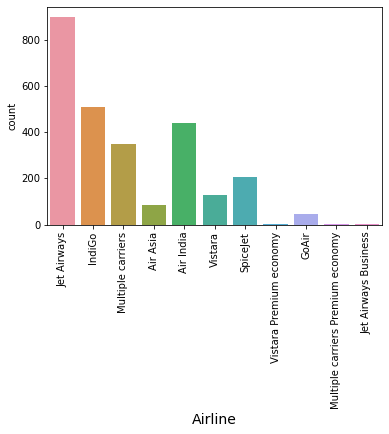

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(x='Airline', data=df1)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=90)

In [91]:
# the graph clearly shows that jet airways has highest number of flights followed by indigo and airindia.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Banglore'),
  Text(3, 0, 'Mumbai'),
  Text(4, 0, 'Chennai')])

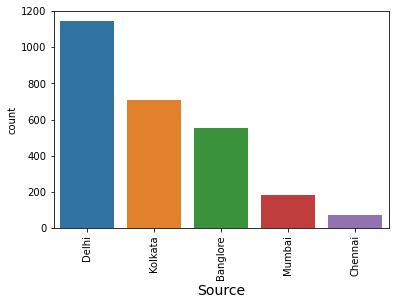

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(x='Source', data=df1)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cochin'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'New Delhi'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Kolkata')])

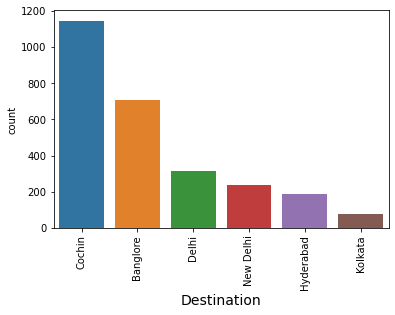

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(x='Destination', data=df1)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1 stop'),
  Text(1, 0, 'non-stop'),
  Text(2, 0, '2 stops'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

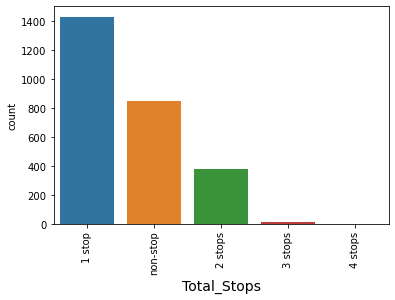

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(x='Total_Stops', data=df1)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Long layover'),
  Text(4, 0, 'Business class'),
  Text(5, 0, 'Change airports')])

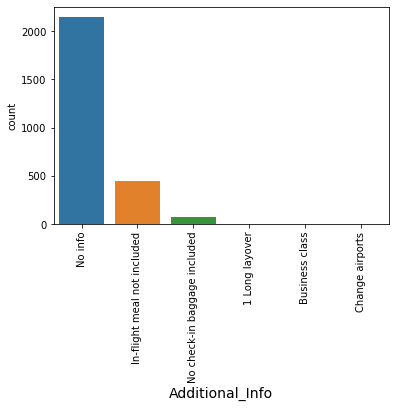

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(x='Additional_Info', data=df1)
plt.xlabel('Additional_Info', fontsize=14)
plt.xticks(rotation=90)

In [96]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [97]:
#Date_of_journey

In [98]:
df1["Journey_day"] = pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.day
df1["Journey_month"] = pd.to_datetime(df1["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df1.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [99]:
# Dep_Time
df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [100]:
# Arrival_Time
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [101]:
#Duration
df1['Duration']=df1['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
df1['Duration']=pd.to_numeric(df1['Duration'])

In [102]:
from sklearn.preprocessing import LabelEncoder
columns = ['Airline','Source','Destination','Total_Stops']
le = LabelEncoder()
for i in columns:
    df1[i] = le.fit_transform(df1[i])

In [103]:
#Route
df1.drop(["Route"], axis = 1, inplace = True)

In [104]:
#Total Stops
df1["Total_Stops"].value_counts()

0    1431
4     849
1     379
2      11
3       1
Name: Total_Stops, dtype: int64

In [105]:
# now we will replace stop column into numbers
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [106]:
#Additional_info
df1.drop(["Additional_Info"], axis = 1, inplace = True)

In [107]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,655,0,6,6,17,30,4,25
1,3,3,0,240,0,12,5,6,20,10,20
2,4,2,1,1425,0,21,5,19,15,19,0
3,6,2,1,780,0,21,5,8,0,21,0
4,0,0,2,170,4,24,6,23,55,2,45


In [108]:
import joblib

In [109]:
joblib.dump(rfr,"flight_price_prediction.obj")

['flight_price_prediction.obj']